# Perkenalan

Nama : Hilal Amirudin

Batch : RMT 019

Objektif : Memprediksi Harga penutupan saham BBCA berdasarkan data perdagangan harian 2020 - 2023

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Data Loading

In [ ]:
BBCA = pd.read_csv ('/content/drive/MyDrive/ihsgstockdata/daily/BBCA.csv')

In [ ]:
BBCA.head(10)

,timestamp,open,low,high,close,volume
0,2001-04-16,175,175,180,177,0
1,2001-04-17,175,175,180,177,0
2,2001-04-18,175,175,180,177,0
3,2001-04-19,175,175,180,177,0
4,2001-04-20,175,175,180,177,0
5,2001-04-23,175,175,180,177,0
6,2001-04-24,175,175,180,177,0
7,2001-04-25,175,175,180,177,0
8,2001-04-26,175,175,180,177,0
9,2001-04-27,175,175,180,177,0


In [ ]:
BBCA.tail(10)

,timestamp,open,low,high,close,volume
5660,2022-12-26,8500,8500,8625,8575,20495900
5661,2022-12-27,8600,8575,8650,8600,27193800
5662,2022-12-28,8650,8550,8650,8650,40420200
5663,2022-12-29,8525,8500,8600,8575,47020900
5664,2022-12-30,8575,8550,8650,8550,44681400
5665,2023-01-02,8575,8500,8600,8550,10653900
5666,2023-01-03,8550,8525,8600,8550,27399100
5667,2023-01-04,8525,8350,8575,8350,90918800
5668,2023-01-05,8350,8150,8375,8250,128838500
5669,2023-01-06,8100,8100,8325,8300,69286600


In [ ]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5670 non-null   object
 1   open       5670 non-null   int64 
 2   low        5670 non-null   int64 
 3   high       5670 non-null   int64 
 4   close      5670 non-null   int64 
 5   volume     5670 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 265.9+ KB


In [ ]:
BBCA.describe()

,open,low,high,close,volume
count,5670.000000,5670.000000,5670.000000,5670.000000,5.670000e+03
mean,2418.109877,2393.385538,2442.639506,2418.603175,8.919048e+07
std,2379.071545,2357.118837,2400.150856,2378.798150,1.274925e+08
min,175.000000,175.000000,177.000000,177.000000,0.000000e+00
25%,460.000000,455.000000,467.000000,460.500000,2.719000e+07
50%,1585.000000,1570.000000,1600.000000,1585.000000,6.161450e+07
75%,3743.750000,3715.000000,3765.000000,3740.000000,1.045481e+08
max,9050.000000,8975.000000,9400.000000,9300.000000,1.949960e+09


In [ ]:
# Merubah tipe data objek ke datetime

BBCA['timestamp'] = pd.to_datetime(BBCA['timestamp'])
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5670 non-null   datetime64[ns]
 1   open       5670 non-null   int64         
 2   low        5670 non-null   int64         
 3   high       5670 non-null   int64         
 4   close      5670 non-null   int64         
 5   volume     5670 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 265.9 KB


In [ ]:
BBCA

,timestamp,open,low,high,close,volume
0,2001-04-16,175,175,180,177,0
1,2001-04-17,175,175,180,177,0
2,2001-04-18,175,175,180,177,0
3,2001-04-19,175,175,180,177,0
4,2001-04-20,175,175,180,177,0
...,...,...,...,...,...,...
5665,2023-01-02,8575,8500,8600,8550,10653900
5666,2023-01-03,8550,8525,8600,8550,27399100
5667,2023-01-04,8525,8350,8575,8350,90918800
5668,2023-01-05,8350,8150,8375,8250,128838500


In [ ]:
# Buat kolom tahun berdasarkan kolom tanggal

BBCA['Tahun'] = BBCA['timestamp'].dt.year
BBCA['Bulan'] = BBCA['timestamp'].dt.month
BBCA['Hari'] = BBCA['timestamp'].dt.day

In [ ]:
# Filter dataframe hanya untuk 3 tahun sebelum tahun 2023 untuk keperluan EDA

f_BBCA = BBCA[BBCA['Tahun'] >= 2020]
f_BBCA

,timestamp,open,low,high,close,volume,Tahun,Bulan,Hari
4882,2020-01-01,6680,6670,6720,6685,0,2020,1,1
4883,2020-01-02,6695,6680,6780,6690,49445000,2020,1,2
4884,2020-01-03,6750,6725,6800,6800,47755500,2020,1,3
4885,2020-01-06,6720,6690,6750,6735,27300000,2020,1,6
4886,2020-01-07,6735,6730,6770,6740,45022500,2020,1,7
...,...,...,...,...,...,...,...,...,...
5665,2023-01-02,8575,8500,8600,8550,10653900,2023,1,2
5666,2023-01-03,8550,8525,8600,8550,27399100,2023,1,3
5667,2023-01-04,8525,8350,8575,8350,90918800,2023,1,4
5668,2023-01-05,8350,8150,8375,8250,128838500,2023,1,5


# EDA

## Statistik Deskriptif

### Harga Saham BBCA

In [ ]:
# Membuat DataFrame baru menggunakan `timestamp` sebagai Index dan `close` sebagai harga saham

Price_BBCA = f_BBCA.set_index('timestamp')['close']

In [ ]:
Price_BBCA.describe()

count     788.000000
mean     6914.270305
std       986.002418
min      4430.000000
25%      6233.750000
50%      6775.000000
75%      7650.000000
max      9300.000000
Name: close, dtype: float64

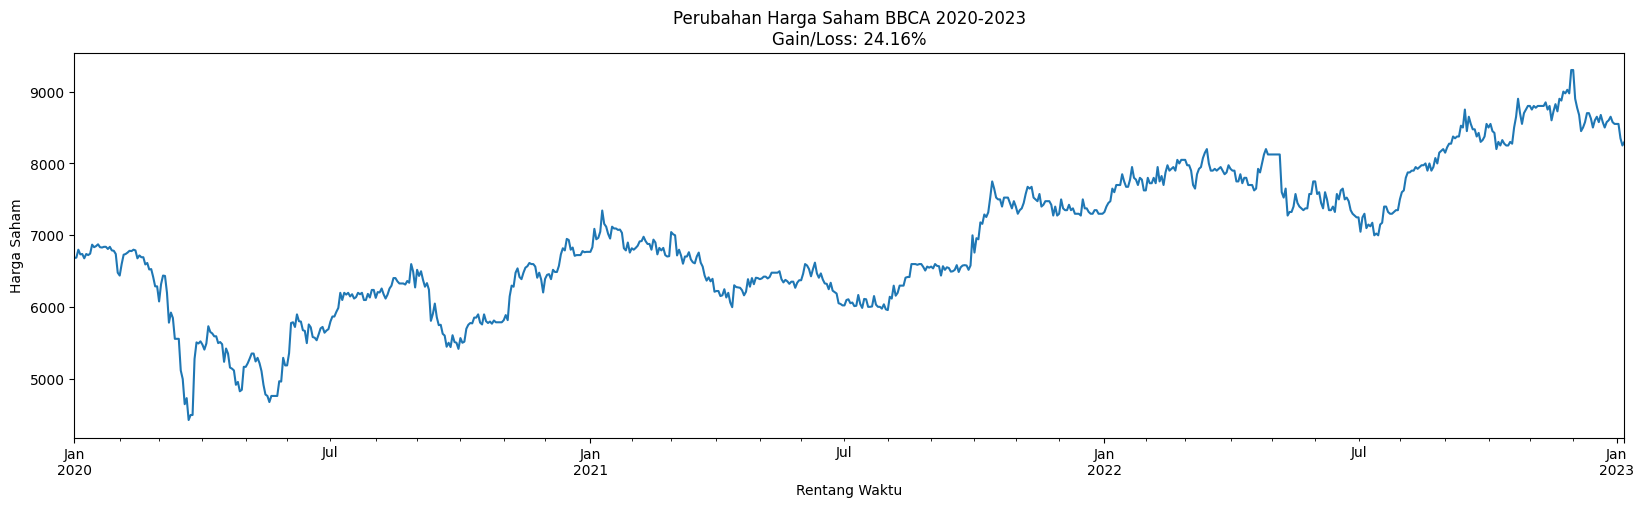

In [ ]:
# Menghitung presentase selisih
start_price = Price_BBCA.iloc[0]
end_price = Price_BBCA.iloc[-1]
percentage_change = (end_price - start_price) / start_price * 100

# Membuat plot
Price_BBCA.plot(figsize=(20,5))
plt.title('Perubahan Harga Saham BBCA 2020-2023\nGain/Loss: {:.2f}%'.format(percentage_change))
plt.xlabel('Rentang Waktu')
plt.ylabel('Harga Saham')
plt.show()

Secara Kumulatif selama 3 tahun terakhir saham BBCA terus mengalami kenaikan harga dengan harga all-time-high menyentuh angka Rp 9300 / Lembar sahamnya

### Volume Perdagangan Saham BBCA

In [ ]:
# Membuat DataFrame baru menggunakan `timestamp` sebagai Index dan `volume` sebagai volume perdagangan

Vol_BBCA = f_BBCA.set_index('timestamp')['volume']

In [ ]:
Vol_BBCA.describe()

count    7.880000e+02
mean     8.779528e+07
std      6.037839e+07
min      0.000000e+00
25%      5.740075e+07
50%      7.729125e+07
75%      1.078482e+08
max      6.443596e+08
Name: volume, dtype: float64

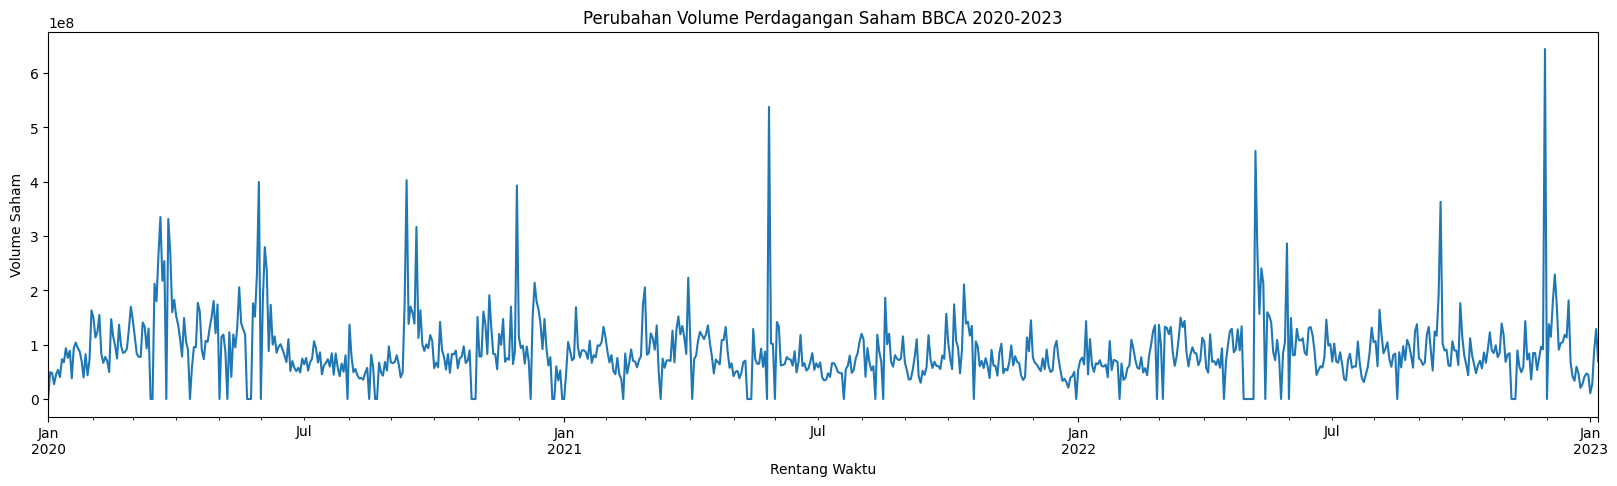

In [ ]:
# Membuat plot

Vol_BBCA.plot(figsize=(20,5))
plt.title('Perubahan Volume Perdagangan Saham BBCA 2020-2023')
plt.xlabel('Rentang Waktu')
plt.ylabel('Volume Saham')
plt.show()

Volume perdagangan cenderung fluktuatif dan mengalami peningkatan volume menjelang berakhirnya semester atau quartal. Dapat disimpulkan sementara pergerakan volume perdagangan tersebut disebabkan oleh faktor-faktor berikut:

1. Laporan Keuangan Q1 - Q4 (Quartal)
2. Pembagian Deviden (Semester)

Karena Pengumuman Laporan Keuangan berada pada siklus quartal, mari kita cek volume perdagangan setiap quartalnya

## Volume Perdagangan dan Harga Saham berdasarkan Quartal

In [ ]:
# Buat datset baru

f_BBCA_copy = f_BBCA.copy()

In [ ]:
# Menghitung  apakah harga berada di akhir quartal atau tidak dengan 0 tidak 1 iya

f_BBCA_copy.loc[:, 'quarter_end'] = np.where(f_BBCA_copy['Bulan'] % 3 == 0, 1, 0)
f_BBCA_copy.head()

,timestamp,open,low,high,close,volume,Tahun,Bulan,Hari,quarter_end
4882,2020-01-01,6680,6670,6720,6685,0,2020,1,1,0
4883,2020-01-02,6695,6680,6780,6690,49445000,2020,1,2,0
4884,2020-01-03,6750,6725,6800,6800,47755500,2020,1,3,0
4885,2020-01-06,6720,6690,6750,6735,27300000,2020,1,6,0
4886,2020-01-07,6735,6730,6770,6740,45022500,2020,1,7,0


In [ ]:
# Menampilkan rata-rata dari quarter_end

numeric_columns = f_BBCA_copy.select_dtypes(include=np.number).columns
f_BBCA_copy.groupby('quarter_end')[numeric_columns].mean()

,open,low,high,close,volume,Tahun,Bulan,Hari,quarter_end
quarter_end,,,,,,,,,
0,6907.711538,6834.211538,6974.701923,6907.951923,8.340515e+07,2021.015385,5.990385,15.578846,0.0
1,6933.097015,6853.544776,7015.895522,6926.529851,9.631346e+07,2021.000000,7.500000,15.753731,1.0


Pada harga saham BBCA setelah pengumuman Laporan Keuangan pada setiap quartal cenderung tidak memberikan dampak signifikan terhadap perubahan harganya, akan tetapi terjadi perubahan signifikan pada volume perdagannya.

Dapat disimpulkan sementara, banyak dari para investor yang sedang melakukan spekulasi terhadap saham BBCA pasca terbitnya Laporan Keuangan, namun spekulasi tersebut tidak menggerakkan harga secara signifikan

## Kenaikan dan Penurunan

Saya memiliki asumsi perlu melakukan analisis lebih lanjut dimana harga saham tersebut jika dalam satu hari memenuhi kondisi berikut:

* open-close : selisih harga pembukaan 'open' dikurangi harga penutupan 'close'
* low-high : selisih harga terendah 'low' dikurangi harga tertinggi 'high'
* 0 untuk Gain 'G' jika harga penutupan 'close' berada diatas harga penutupan hari sebelumnya sebelumnya
* 1 untuk Lose 'L' jika harga penutupan 'close' berada dibawah harga penutupan hari sebelumnya.

In [ ]:
f_BBCA_copy['open-close'] = f_BBCA_copy['open'] - f_BBCA_copy['close']
f_BBCA_copy['low-high'] = f_BBCA_copy['low'] - f_BBCA_copy['high']
f_BBCA_copy['G/L'] = np.where(f_BBCA_copy['close'].shift(-1) > f_BBCA_copy['close'], 1, 0)

In [ ]:
f_BBCA_copy

,timestamp,open,low,high,close,volume,Tahun,Bulan,Hari,quarter_end,open-close,low-high,G/L
4882,2020-01-01,6680,6670,6720,6685,0,2020,1,1,0,-5,-50,1
4883,2020-01-02,6695,6680,6780,6690,49445000,2020,1,2,0,5,-100,1
4884,2020-01-03,6750,6725,6800,6800,47755500,2020,1,3,0,-50,-75,0
4885,2020-01-06,6720,6690,6750,6735,27300000,2020,1,6,0,-15,-60,1
4886,2020-01-07,6735,6730,6770,6740,45022500,2020,1,7,0,-5,-40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,2023-01-02,8575,8500,8600,8550,10653900,2023,1,2,0,25,-100,0
5666,2023-01-03,8550,8525,8600,8550,27399100,2023,1,3,0,0,-75,0
5667,2023-01-04,8525,8350,8575,8350,90918800,2023,1,4,0,175,-225,0
5668,2023-01-05,8350,8150,8375,8250,128838500,2023,1,5,0,100,-225,1


## Cek Korelasi

<ipython-input-136-184831dd82f4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = f_BBCA_copy.corr()


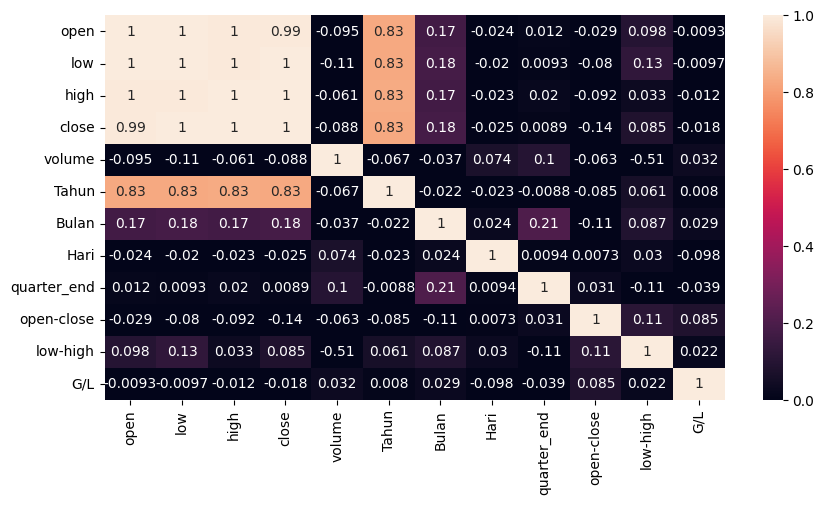

In [ ]:
# Mari kita cek korelasi data yang ada berdasarkan heatmapnya dengan meilhat variable warna

corr = f_BBCA_copy.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Ternyata kolom open, low, high, close, dan Tahun merupakan kolom yang saling memiliki korelasi antar satu sama lain mendekati nilai 1. artinya setiap kolom tersebut memilihi hubungan pengaruh yang signifikan

## Analisis Missing Value

In [ ]:
f_BBCA_copy.isna().mean()*100

timestamp      0.0
open           0.0
low            0.0
high           0.0
close          0.0
volume         0.0
Tahun          0.0
Bulan          0.0
Hari           0.0
quarter_end    0.0
open-close     0.0
low-high       0.0
G/L            0.0
dtype: float64

Ternyata tidak terdapat NaN atau missing value didalam datasetnya

## Analisis dan Handling Outlier

In [ ]:
# Mari kita cek Outliernya menggunakan metode skew

f_BBCA_copy.skew()

<ipython-input-138-eda22bee541a>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_BBCA_copy.skew()


open           0.054233
low            0.044209
high           0.142980
close          0.084566
volume         2.972624
Tahun          0.047919
Bulan         -0.004103
Hari           0.015585
quarter_end    0.676331
open-close    -0.382126
low-high      -3.249844
G/L            0.298227
dtype: float64

Dapatt dilihat outliernya cenderung rendah dan hanya terdapat outlier ekstrim pada kolom volume

In [ ]:
# Handling Outlier menggunakan metode Zscore pada kolom 'volume'

z_scores = stats.zscore(f_BBCA_copy['volume'])
threshold = 3
mask = (np.abs(z_scores) < threshold)
f_BBCA_copy = f_BBCA_copy[mask]

In [ ]:
# cek ulang

f_BBCA_copy.skew()

<ipython-input-140-b1a4f3c48f18>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_BBCA_copy.skew()


open           0.063430
low            0.054722
high           0.128528
close          0.076995
volume         0.715932
Tahun          0.039766
Bulan         -0.007389
Hari           0.022566
quarter_end    0.692087
open-close    -0.047582
low-high      -2.426656
G/L            0.300679
dtype: float64

In [ ]:
f_BBCA_copy.to_csv('BBCA Daily.csv', index=False)

In [ ]:
f_BBCA_copy = f_BBCA_copy.drop(['Tahun', 'Bulan', 'Hari', 'quarter_end', 'open-close', 'low-high', 'G/L'], axis=1)

In [ ]:
f_BBCA_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 4882 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  775 non-null    datetime64[ns]
 1   open       775 non-null    int64         
 2   low        775 non-null    int64         
 3   high       775 non-null    int64         
 4   close      775 non-null    int64         
 5   volume     775 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 42.4 KB


In [ ]:
f_BBCA_copy.isnull().sum()

timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64

In [ ]:
f_BBCA_copy.reset_index(drop=True)

,timestamp,open,low,high,close,volume
0,2020-01-01,6680,6670,6720,6685,0
1,2020-01-02,6695,6680,6780,6690,49445000
2,2020-01-03,6750,6725,6800,6800,47755500
3,2020-01-06,6720,6690,6750,6735,27300000
4,2020-01-07,6735,6730,6770,6740,45022500
...,...,...,...,...,...,...
770,2023-01-02,8575,8500,8600,8550,10653900
771,2023-01-03,8550,8525,8600,8550,27399100
772,2023-01-04,8525,8350,8575,8350,90918800
773,2023-01-05,8350,8150,8375,8250,128838500


# Feature Enginering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data, dan kebutuhan data lain-lain

## Split antara data Train dan Test

Karena yang akan diprediksi adalah harganya, maka kita akan menggunakan 'close' sebagai targetnya untuk memprediksi harga. hal ini didukung oleh harga 'close' merupakan harga final terbentuknya harga suatu saham sesudah terjadinya proses perdagangan di Bursa Saham Indonesia. Data dari 2020 sampai 2021 akan kita jadikan sebagai data train, sisanya menjadi data test.

In [ ]:
# Filter data train (2020-2022)
train_data = f_BBCA_copy[(f_BBCA_copy['timestamp'].dt.year >= 2020) & (f_BBCA_copy['timestamp'].dt.year <= 2021)]

# Filter data test (2022-2023)
test_data = f_BBCA_copy[(f_BBCA_copy['timestamp'].dt.year >= 2022) & (f_BBCA_copy['timestamp'].dt.year <= 2023)]

# Print the shapes of train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (514, 6)
Test data shape: (261, 6)


## Split between Train-Set and Test-Set

In [ ]:
# Separate features (X) and target (y) for train data
X_train = train_data[['timestamp', 'open', 'low', 'high', 'volume']]
y_train = train_data['close']

# Separate features (X) and target (y) for test data
X_test = test_data[['timestamp', 'open', 'low', 'high', 'volume']]
y_test = test_data['close']

# Print the shapes of train and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (514, 5)
X_test shape: (261, 5)
y_train shape: (514,)
y_test shape: (261,)


In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train

,timestamp,open,low,high,volume
0,2020-01-01,6680,6670,6720,0
1,2020-01-02,6695,6680,6780,49445000
2,2020-01-03,6750,6725,6800,47755500
3,2020-01-06,6720,6690,6750,27300000
4,2020-01-07,6735,6730,6770,45022500
...,...,...,...,...,...
509,2021-12-27,7300,7300,7350,20722100
510,2021-12-28,7375,7325,7400,39343800
511,2021-12-29,7350,7300,7375,42079500
512,2021-12-30,7350,7300,7350,49954700


In [ ]:
X_test

,timestamp,open,low,high,volume
0,2022-01-03,7325,7300,7400,54287400
1,2022-01-04,7325,7325,7450,70624000
2,2022-01-05,7450,7375,7525,76164900
3,2022-01-06,7500,7425,7525,63657100
4,2022-01-07,7550,7500,7700,143433300
...,...,...,...,...,...
256,2023-01-02,8575,8500,8600,10653900
257,2023-01-03,8550,8525,8600,27399100
258,2023-01-04,8525,8350,8575,90918800
259,2023-01-05,8350,8150,8375,128838500


## Split antara Numerikal dan Kategorikal

In [ ]:
# Mendapatkan Kolom Numeric and Kolom Kategorik

num_columns = ['open', 'low', 'high', 'volume']
cat_columns = ['timestamp']

In [ ]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,open,low,high,volume
0,6680,6670,6720,0
1,6695,6680,6780,49445000
2,6750,6725,6800,47755500
3,6720,6690,6750,27300000
4,6735,6730,6770,45022500
...,...,...,...,...
509,7300,7300,7350,20722100
510,7375,7325,7400,39343800
511,7350,7300,7375,42079500
512,7350,7300,7350,49954700


## Feature Scalling

In [ ]:
X_train.describe()

,open,low,high,volume
count,514.000000,514.000000,514.000000,5.140000e+02
mean,6386.799611,6306.420233,6448.521401,8.274439e+07
std,647.730647,652.539220,636.923307,4.554761e+07
min,4450.000000,4405.000000,4800.000000,0.000000e+00
25%,6040.000000,5981.250000,6100.000000,5.502025e+07
50%,6410.000000,6342.500000,6472.500000,7.501450e+07
75%,6800.000000,6720.000000,6845.000000,1.060049e+08
max,7800.000000,7600.000000,8250.000000,2.644190e+08


Karena meannya lebih besar dari standar deviasinya maka kia akan menggunakan MinMaxScaler untuk melakukan scalling

In [ ]:
# Featue Scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.66567164, 0.70892019, 0.55652174, 0.        ],
       [0.67014925, 0.71205008, 0.57391304, 0.18699488],
       [0.68656716, 0.72613459, 0.57971014, 0.1806054 ],
       ...,
       [0.86567164, 0.90610329, 0.74637681, 0.15913947],
       [0.86567164, 0.90610329, 0.73913043, 0.18892251],
       [0.86567164, 0.90610329, 0.73913043, 0.        ]])

In [ ]:
# Menggabungkan kolom

X_train_final = np.concatenate([X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_num_scaled], axis=1)
X_train_final

array([[0.66567164, 0.70892019, 0.55652174, 0.        ],
       [0.67014925, 0.71205008, 0.57391304, 0.18699488],
       [0.68656716, 0.72613459, 0.57971014, 0.1806054 ],
       ...,
       [0.86567164, 0.90610329, 0.74637681, 0.15913947],
       [0.86567164, 0.90610329, 0.73913043, 0.18892251],
       [0.86567164, 0.90610329, 0.73913043, 0.        ]])

In [ ]:
# Mengubah kolom timestamp menjadi DataFrame dengan nama kolom 'timestamp'

timestamp_train = pd.DataFrame(X_train['timestamp'])
timestamp_test = pd.DataFrame(X_test['timestamp'])

In [ ]:
timestamp_train = timestamp_train.reset_index(drop=True)
timestamp_test = timestamp_test.reset_index(drop=True)

In [ ]:
timestamp_train

,timestamp
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-06
4,2020-01-07
...,...
509,2021-12-27
510,2021-12-28
511,2021-12-29
512,2021-12-30


In [ ]:
# Convert `X_train_final` to a DataFrame
X_train_final_df = pd.DataFrame(X_train_final, columns=num_columns)
X_test_final_df = pd.DataFrame(X_test_final, columns=num_columns)

X_train_final_df

,open,low,high,volume
0,0.665672,0.708920,0.556522,0.000000
1,0.670149,0.712050,0.573913,0.186995
2,0.686567,0.726135,0.579710,0.180605
3,0.677612,0.715180,0.565217,0.103245
4,0.682090,0.727700,0.571014,0.170270
...,...,...,...,...
509,0.850746,0.906103,0.739130,0.078368
510,0.873134,0.913928,0.753623,0.148793
511,0.865672,0.906103,0.746377,0.159139
512,0.865672,0.906103,0.739130,0.188923


In [ ]:
# Concatenate `X_train_final_df` DataFrame with `timestamp_train` column
X_train_transformed = pd.concat([X_train_final_df, timestamp_train], axis=1)
X_test_transformed = pd.concat([X_test_final_df, timestamp_test], axis=1)

# Display the transformed DataFrame
X_train_transformed

,open,low,high,volume,timestamp
0,0.665672,0.708920,0.556522,0.000000,2020-01-01
1,0.670149,0.712050,0.573913,0.186995,2020-01-02
2,0.686567,0.726135,0.579710,0.180605,2020-01-03
3,0.677612,0.715180,0.565217,0.103245,2020-01-06
4,0.682090,0.727700,0.571014,0.170270,2020-01-07
...,...,...,...,...,...
509,0.850746,0.906103,0.739130,0.078368,2021-12-27
510,0.873134,0.913928,0.753623,0.148793,2021-12-28
511,0.865672,0.906103,0.746377,0.159139,2021-12-29
512,0.865672,0.906103,0.739130,0.188923,2021-12-30


In [ ]:
#X_train_transformed['timestamp'] = X_train_transformed['timestamp'].astype(np.int64)
#X_test_transformed['timestamp'] = X_test_transformed['timestamp'].astype(np.int64)

In [ ]:
# Buat kolom tahun berdasarkan kolom tanggal untuk X train transformed

X_train_transformed['Tahun'] = X_train_transformed['timestamp'].dt.year
X_train_transformed['Bulan'] = X_train_transformed['timestamp'].dt.month
X_train_transformed['Hari'] = X_train_transformed['timestamp'].dt.day
X_train_transformed = X_train_transformed.drop(['timestamp'], axis=1)
X_train_transformed

,open,low,high,volume,Tahun,Bulan,Hari
0,0.665672,0.708920,0.556522,0.000000,2020,1,1
1,0.670149,0.712050,0.573913,0.186995,2020,1,2
2,0.686567,0.726135,0.579710,0.180605,2020,1,3
3,0.677612,0.715180,0.565217,0.103245,2020,1,6
4,0.682090,0.727700,0.571014,0.170270,2020,1,7
...,...,...,...,...,...,...,...
509,0.850746,0.906103,0.739130,0.078368,2021,12,27
510,0.873134,0.913928,0.753623,0.148793,2021,12,28
511,0.865672,0.906103,0.746377,0.159139,2021,12,29
512,0.865672,0.906103,0.739130,0.188923,2021,12,30


In [ ]:
X_test_transformed['Tahun'] = X_test_transformed['timestamp'].dt.year
X_test_transformed['Bulan'] = X_test_transformed['timestamp'].dt.month
X_test_transformed['Hari'] = X_test_transformed['timestamp'].dt.day
X_test_transformed = X_test_transformed.drop(['timestamp'], axis=1)

In [ ]:
cat_num_columns = ['Tahun', 'Bulan', 'Hari']

# Linear Regression

In [ ]:
X_train_transformed.shape

(514, 7)

In [ ]:
# Model Training

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_transformed,y_train)

LinearRegression()

In [ ]:
# Model Evaluation
log_pred_train = model_lr.predict(X_train_transformed)
log_pred_test = model_lr.predict(X_test_transformed)

print('Train MAE:',mean_absolute_error(y_train,log_pred_train))
print('Test MAE:',mean_absolute_error(y_test,log_pred_test))

print('Train MSE:',mean_squared_error(y_train,log_pred_train))
print('Test MSE:',mean_squared_error(y_test,log_pred_test))

print('Train MSLE:',mean_squared_log_error(y_train,log_pred_train))
print('Test MSLE:',mean_squared_log_error(y_test,log_pred_test))

print('Train R-squared::',r2_score(y_train,log_pred_train))
print('Test R-squared::',r2_score(y_test,log_pred_test))

Train MAE: 39.05944696683598
Test MAE: 44.91572710073908
Train MSE: 2894.691847654463
Test MSE: 2979.064316752745
Train MSLE: 7.899999772160116e-05
Test MSLE: 4.703995294756315e-05
Train R-squared:: 0.9930762793536246
Test R-squared:: 0.9880999164420686


# Ridge Regression

In [ ]:
# Model Training

model_rid = Ridge(alpha=0.5)
model_rid.fit(X_train_transformed,y_train)

Ridge(alpha=0.5)

In [ ]:
# Model Evaluation
rid_pred_train = model_rid.predict(X_train_transformed)
rid_pred_test = model_rid.predict(X_test_transformed)

print('Train MAE:',mean_absolute_error(y_train,rid_pred_train))
print('Test MAE:',mean_absolute_error(y_test,rid_pred_test))

print('Train MSE:',mean_squared_error(y_train,rid_pred_train))
print('Test MSE:',mean_squared_error(y_test,log_pred_test))

print('Train MSLE:',mean_squared_log_error(y_train,rid_pred_train))
print('Test MSLE:',mean_squared_log_error(y_test,rid_pred_test))

print('Train R-squared::',r2_score(y_train,rid_pred_train))
print('Test R-squared::',r2_score(y_test,rid_pred_test))

Train MAE: 47.402791740549844
Test MAE: 58.12311454567322
Train MSE: 3987.668789774444
Test MSE: 2979.064316752745
Train MSLE: 0.00010934611863881735
Test MSLE: 8.151048663214364e-05
Train R-squared:: 0.9904620228391358
Test R-squared:: 0.9791454790895926


# Lasso Regression

In [ ]:
# Model Training

model_las = Lasso(alpha=0.5)
model_las.fit(X_train_transformed, y_train)

Lasso(alpha=0.5)

In [ ]:
# Model Evaluation
las_pred_train = model_las.predict(X_train_transformed)
las_pred_test = model_las.predict(X_test_transformed)

print('Train MAE:',mean_absolute_error(y_train,las_pred_train))
print('Test MAE:',mean_absolute_error(y_test,las_pred_test))

print('Train MSE:',mean_squared_error(y_train,las_pred_train))
print('Test MSE:',mean_squared_error(y_test,las_pred_test))

print('Train MSLE:',mean_squared_log_error(y_train,las_pred_train))
print('Test MSLE:',mean_squared_log_error(y_test,las_pred_test))

print('Train R-squared::',r2_score(y_train,las_pred_train))
print('Test R-squared::',r2_score(y_test,las_pred_test))

Train MAE: 42.65036403696223
Test MAE: 52.59466497426652
Train MSE: 3263.7839642578983
Test MSE: 4312.374450255774
Train MSLE: 8.852832250448727e-05
Test MSLE: 6.735203343918919e-05
Train R-squared:: 0.9921934597504906
Test R-squared:: 0.982773914613878


# Aded Cross Validation

In [ ]:
# Melakukan cross validation dengan 5-fold

log_scores_train = cross_val_score(model_lr, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_error')
log_scores_test = cross_val_score(model_lr, X_test_transformed, y_test, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
# Mengubah nilai error menjadi positif

mae_scores_log_train = -log_scores_train
mae_scores_log_test = -log_scores_test

In [ ]:
# Menampilkan nilai MAE untuk setiap fold
for i, score in enumerate(mae_scores_log_train):
    print(f"Fold-{i+1} MAE: {score}")

# Menampilkan rata-rata MAE dari cross validation
print("Mean MAE:", mae_scores_log_train.mean())

Fold-1 MAE: 48.43725105050817
Fold-2 MAE: 40.91840013110545
Fold-3 MAE: 36.11083086827973
Fold-4 MAE: 35.13463774134118
Fold-5 MAE: 46.17164245813707
Mean MAE: 41.354552449874326


In [ ]:
log_pred_all = np.concatenate([np.array([0, 0]), log_pred_train, log_pred_test], axis=0)
log_pred_all

array([   0.        ,    0.        , 6719.42188923, 6749.36443134,
       6778.11168792, 6732.4750591 , 6768.74643678, 6726.30101539,
       6758.27904189, 6766.0549839 , 6760.14435123, 6821.60846021,
       6917.02386464, 6848.91545679, 6843.23260861, 6870.32509629,
       6846.10457251, 6863.03525928, 6849.01817069, 6845.22182064,
       6863.03570216, 6774.41066992, 6798.09745645, 6749.44761524,
       6534.75346884, 6464.36501049, 6576.91956871, 6695.03884507,
       6729.85559167, 6761.46253248, 6684.92336622, 6770.06064847,
       6784.39324666, 6771.43316113, 6713.77056134, 6725.39246845,
       6700.80919633, 6722.36367102, 6597.83658904, 6633.77013086,
       6543.59219886, 6527.81055907, 6456.24669724, 6253.85463354,
       6109.71963227, 6108.35959944, 6300.75233892, 6387.6221345 ,
       6402.36448023, 6253.09612807, 5865.47217456, 5944.75105771,
       5855.85841166, 5526.07363403, 5585.49628216, 5582.7898849 ,
       5206.73189621, 4971.41409362, 4724.45708097, 4597.04059

In [ ]:
log_pred_all_df = pd.DataFrame(log_pred_all, columns=['Predictions'])
log_pred_all_df_filtered = log_pred_all_df[log_pred_all_df['Predictions'] != 0].reset_index(drop=True)
log_pred_all_df_filtered

,Predictions
0,6719.421889
1,6749.364431
2,6778.111688
3,6732.475059
4,6768.746437
...,...
770,8540.712859
771,8567.371114
772,8416.275695
773,8206.923595


In [ ]:
merged_df = pd.concat([f_BBCA_copy.reset_index(), log_pred_all_df_filtered.reset_index(drop=True)], axis=1)

merged_df

,index,timestamp,open,low,high,close,volume,Predictions
0,4882,2020-01-01,6680,6670,6720,6685,0,6719.421889
1,4883,2020-01-02,6695,6680,6780,6690,49445000,6749.364431
2,4884,2020-01-03,6750,6725,6800,6800,47755500,6778.111688
3,4885,2020-01-06,6720,6690,6750,6735,27300000,6732.475059
4,4886,2020-01-07,6735,6730,6770,6740,45022500,6768.746437
...,...,...,...,...,...,...,...,...
770,5665,2023-01-02,8575,8500,8600,8550,10653900,8540.712859
771,5666,2023-01-03,8550,8525,8600,8550,27399100,8567.371114
772,5667,2023-01-04,8525,8350,8575,8350,90918800,8416.275695
773,5668,2023-01-05,8350,8150,8375,8250,128838500,8206.923595


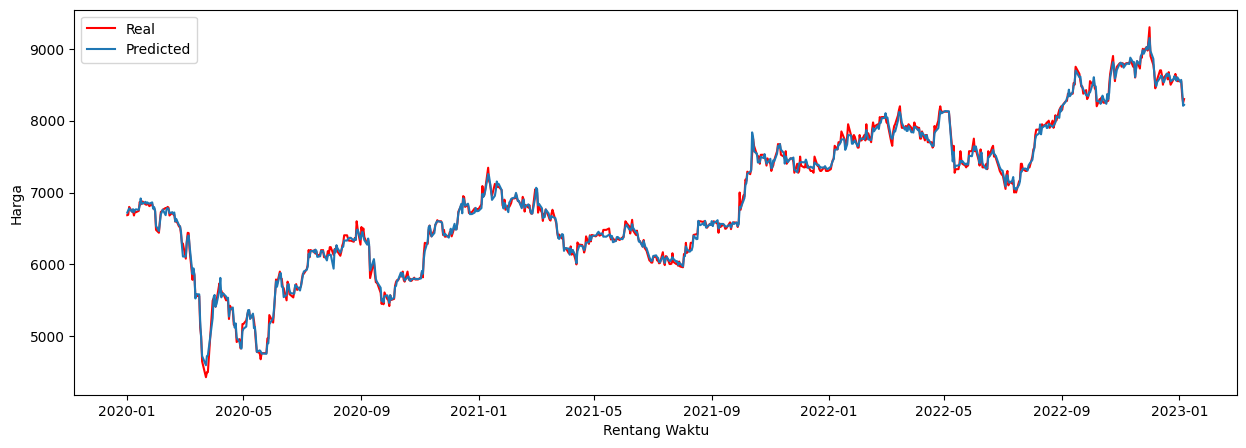

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(merged_df['timestamp'], merged_df['close'], color='red', label='Real')
plt.plot(merged_df['timestamp'], merged_df['Predictions'], label='Predicted')
plt.xlabel('Rentang Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()


# Model Saving

In [ ]:
# Melakukan Penimpanan File

with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lr, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_cols.txt','w') as file_4:
  json.dump(cat_columns, file_4)

with open('list_cat_num_cols.txt','w') as file_5:
  json.dump(cat_num_columns, file_5)

In [ ]:
X_train

,timestamp,open,low,high,volume
0,2020-01-01,6680,6670,6720,0
1,2020-01-02,6695,6680,6780,49445000
2,2020-01-03,6750,6725,6800,47755500
3,2020-01-06,6720,6690,6750,27300000
4,2020-01-07,6735,6730,6770,45022500
...,...,...,...,...,...
509,2021-12-27,7300,7300,7350,20722100
510,2021-12-28,7375,7325,7400,39343800
511,2021-12-29,7350,7300,7375,42079500
512,2021-12-30,7350,7300,7350,49954700


# Kesimpulan

1. Secara akumulatif saham BBCA mengalami trend kenaikan dalam 3 tahun terakhir dengan presentase kenaikan sebasesar 24%

2. Pergerakan harga saham BBCA tidak terlalu fluktuatif cenderung meningkat secara perlahan berbeda dengan volume perdagangannya yang fluktuatif, hal ini mungkin disebabkan oleh usaha spekulasi terhadapa saham tersebut terutama pasca terbitnya laporan keuangan setiap quartal.

3. Setelah dilakukan pemodelan untuk memprediksi harga penutupan harian saham BBCA. didapatkan nilai Mean Absolut Eror yang mendekati 0 adalah Linear Regression. hal ini cukup bagus dalam suatu pemodelan, karena dengan nilai mean absolute eror yang rendah menyatakan algoritma pemodelan mampu melakukan prediksi harga dengan baik.

4. pasca dilakukan pemodelan kami melakukan testing pemodelan menggunakan data dummy, dan berhasil memprediksi harga penutup saham.